# Detecção de dígitos escritos à mão

Nos exemplos anteriores, exploramos a Regressão Linear. Neste exemplo, vamos explorar a Classificação, ou seja, lidar com dados categóricos.

**OBS**.: Não se esqueça de ativar o uso de GPU.

### Qual o nosso objetivo?

Treinar uma rede neural para que ela gere em suas saídas as probabilidades de uma imagem de entrada pertencer a cada uma das possíveis classes.

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

## Importando as bibliotecas

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Obtendo a base de dados

Os dados com os quais trabalharemos são do [Conjunto de dados MNIST](https://www.tensorflow.org/datasets/catalog/mnist).

A função `load_data()` abaixo faz o download da base de dados MNIST e divide o conjunto total de exemplos em conjuntos de treinamento e validação.

Para mais informações sobre essa função, acesse o link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Verificando as dimensões dos dados.

São 60.000 imagens de 28x28 pixels para treinamento e 10.000 de 28x28 pixels para teste.

In [3]:
print("Dimensão das imagens de treinamento:", X_train.shape)
print("Dimensão dos rótulos de treinamento:", y_train.shape)
print("Dimensão das imagens de teste:", X_test.shape)
print("Dimensão dos rótulos de teste:", y_test.shape)

Dimensão das imagens de treinamento: (60000, 28, 28)
Dimensão dos rótulos de treinamento: (60000,)
Dimensão das imagens de teste: (10000, 28, 28)
Dimensão dos rótulos de teste: (10000,)


Vamos visualizar o primeiro exemplo do conjunto de treinamento.

Se imprimirmos a imagem, obtemos uma matriz.

In [4]:
# As imagens são armazenadas como matrizes.
np.set_printoptions(linewidth=200)
print(X_train[0])
print()
print("Class:", y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

Podemos plotar a imagem usando a função `imshow()` da biblioteca matplotlib.

Class: 5



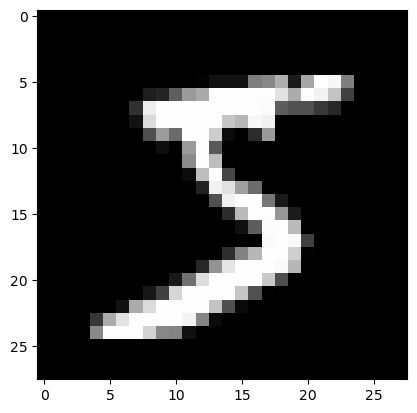

In [5]:
# plot imagem.
plt.imshow(X_train[0], cmap='gray')
print("Class:", y_train[0])
print()

Podemos plotar outras imagens.

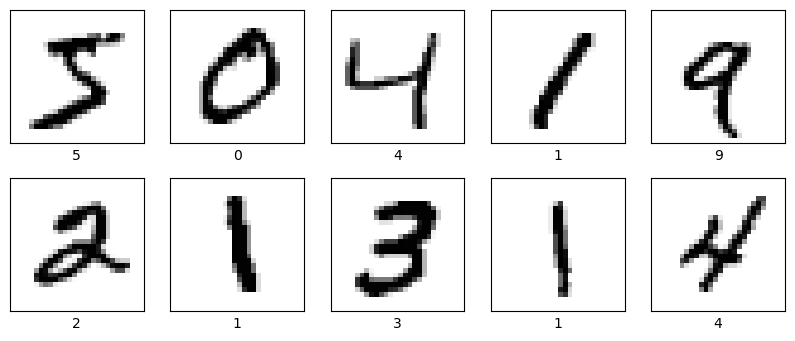

In [6]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='binary') # cmap = 'gray'
    plt.xlabel(y_train[i])

#### Explorando os rótulos.

In [7]:
print(y_train)

[5 0 4 ... 5 6 8]


Se mantivermos os rótulos como números inteiros, devemos usar a função de perda `sparse_categorical_crossentropy`.

Se desejarmos transformá-los na codificação one-hot, devemos usar a função de perda `categorical_crossentropy`.

Para converter os rótulos na codificação one-hot, usamos a função `to_categorical`, a qual deve ser importada do pacote `tensorflow.keras.utils`.

## Pré-procesamento

Na sequência, normalizamos as imagens.

Lembrem-se que as redes neurais aprendem melhor quando os dados estão escalonados, neste caso normalizados.

As imagens são salvas no formato padrão [RGB](https://www.rapidtables.com/web/color/RGB_Color.html)

In [8]:
X_train  = X_train / 255.0
X_test = X_test / 255.0

Vamos imprimir a imagem normalizada.

Vejam que os valores dos pixels estão entre 0 e 1.

In [9]:
np.set_printoptions(linewidth=200)
print(X_train[0])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

## Definindo a rede neural

A figura abaixo mostra a topologia da rede neural que iremos utilizar.

Ela possui 1 camada oculta com 20 neurônios e 1 camada de saída com 10 neurônios (igual ao número de classes).

Utilizaremos uma camada `Flatten` para converter a matrix 28x28 de entrada em um vetor unidimensional.

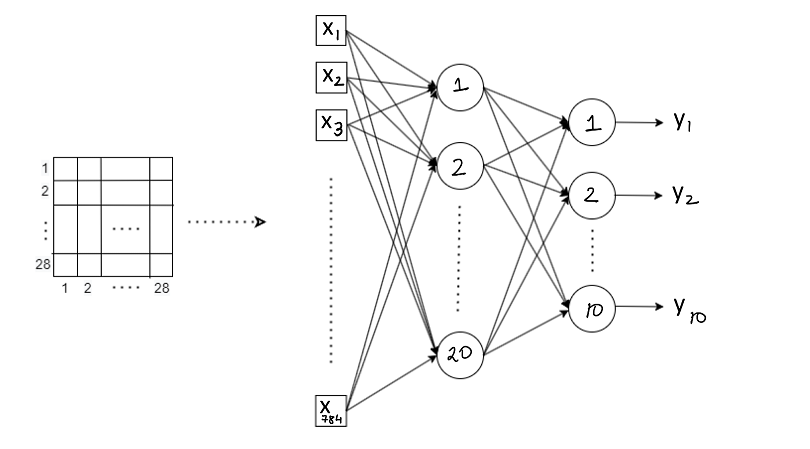

Empilhamos todas as camadas usando a classe `tf.keras.models.Sequential()`.

In [10]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

Vamos verificar a quantidade de parâmetros.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


### Compilando o modelo.

Definimos o otimizador, função de perda e métricas adicionais.

Usamos a acurácia como média adicional. Ela mede o número de amostras corretamente classificadas.

In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Treinando o modelo

Por fim, treinamos o modelo ajustando-o aos dados de treinamento por um número fixo de épocas.

Ao executarmos a célula abaixo, serão impressas as seguintes métricas:

*   Perda calculada com o conjunto de treinamento
*   Acurácia no conjunto de treinamento

O treinamento por 20 épocas deve atingir uma acurácia de cerca de 96% - 98%.

In [13]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3962 - accuracy: 0.8893
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2195 - accuracy: 0.9381
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1863 - accuracy: 0.9470
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.9530
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1515 - accuracy: 0.9564
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1407 - accuracy: 0.9590
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1316 - accuracy: 0.9618
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1250 - accuracy: 0.9625
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1193 - accuracy: 0.9644
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.114

**Observação**

Percebem que o tempo de cada época é bem maior do que aquele dos exemplos anteriores. Isso se deve ao maior número de amostras de treinamento (60.000 imagens).

## Avaliando o desempenho do modelo

Verificando quais resultados estão disponíveis no dicionário `history` com o método `keys()`.

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

Plotando a perda para ambos os conjuntos ao longo das épocas de treinamento.

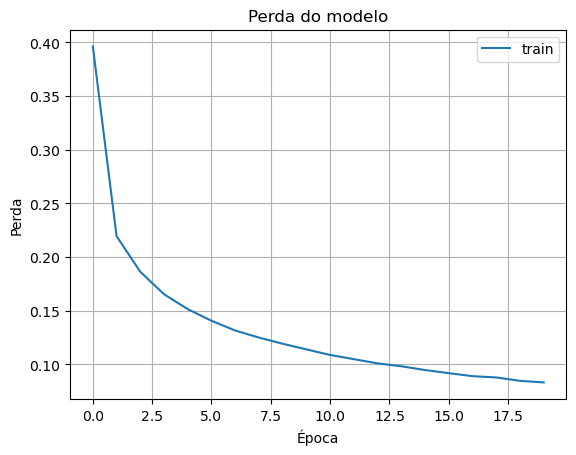

In [16]:
plt.plot(history.history['loss'])
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['train'], loc='upper right')
plt.grid()
plt.show()

Plotando a acurácia para ambos os conjuntos ao longo das épocas de treinamento.

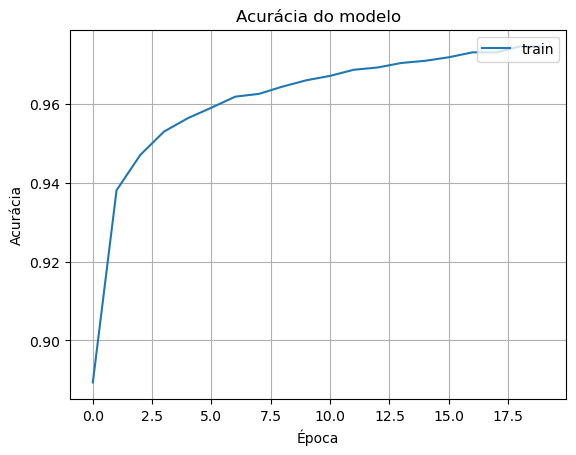

In [17]:
plt.plot(history.history['accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['train'], loc='upper right')
plt.grid()
plt.show()

### Examinando o desempenho no conjunto de teste

Usando o método `model.evaluate()`, podemos obter métricas para um conjunto de teste.

A acurácia será um pouco menor nesse conjunto do que no de treinamento. Isso ocorre porque o modelo não viu esses dados anteriormente e pode não ser totalmente generalizado para todos os dados.

O método `model.evaluate()` retorna um valor de perda seguido pela acurácia no conjunto de treinamento.

In [25]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0740 - accuracy: 0.9782


[0.0740445926785469, 0.9781833291053772]

O método `model.evaluate()` retorna um valor de perda seguido pela acurácia no conjunto de teste.

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9603


[0.1392778903245926, 0.9603000283241272]

Vimos que o método `evaluate` retorna as métricas obtidas pelo modelo em um conjunto de dados.

Porém, se quisermos analisar as predições feitas pelo modelo, devemos usar o método `predict`.

Na célula abaixo, realizamos uma predição com a primeira imagem do conjunto de teste. De acordo com o rótulo, essa é a imagem de um número 7.

Quando observamos os valores das 10 saídas do modelo, percebemos que o 7º neurônio tem uma probabilidade de cerca de 0.99 (99%), que é a mais alta entre todas as saídas. Portanto, o modelo prediz corretamente que a imagem de entrada pertence à classe 7.

In [19]:
classifications = model.predict(X_test)
print(classifications[0])
print("Predicted class: ", np.argmax(classifications[0]))    # retorna índice de probabilidade máxima
print("The actual class: ", y_test[0])

313/313 [==============================] - 0s 926us/step
[6.1518939e-08 9.1829952e-14 2.7683998e-06 4.1194589e-04 9.8990437e-14 3.4724170e-08 3.6068648e-17 9.9958342e-01 1.7111744e-06 5.3778770e-08]
Predicted class:  7
The actual class:  7


Vamos visualizar a predição feita pelo modelo.

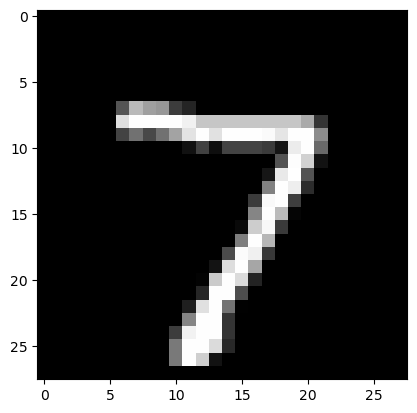

In [21]:
# plot imagem
plt.imshow(X_test[0], cmap='gray')
plt.show()

### Analisando os erros

In [22]:
classes = np.argmax(classifications, axis=1)
different_indices = np.where(classes != y_test)
print(different_indices[0])

[   8   18   61  149  247  259  266  313  320  321  340  381  406  412  445  448  495  508  536  578  619  645  659  691  707  717  720  740  786  810  877  881  924  939  944  947  951  959  965
 1003 1014 1039 1044 1145 1147 1166 1178 1181 1182 1192 1194 1198 1226 1232 1234 1242 1247 1253 1260 1263 1270 1299 1319 1325 1328 1393 1413 1444 1458 1476 1500 1530 1531 1549 1553 1554 1569 1587
 1607 1609 1626 1634 1641 1681 1709 1717 1737 1754 1772 1773 1774 1790 1878 1901 1908 1941 1948 1952 1970 1981 1982 2004 2035 2040 2043 2044 2052 2053 2070 2109 2118 2131 2135 2145 2182 2186 2189
 2224 2225 2272 2293 2299 2329 2339 2369 2387 2395 2406 2414 2422 2433 2448 2488 2512 2514 2545 2548 2573 2582 2610 2648 2654 2658 2721 2730 2771 2810 2836 2863 2896 2907 2919 2921 2927 2939 2945
 2970 2995 3005 3030 3073 3102 3114 3115 3117 3130 3160 3206 3218 3260 3284 3289 3330 3336 3342 3344 3369 3383 3422 3436 3490 3503 3520 3549 3550 3558 3559 3567 3597 3664 3674 3718 3751 3757 3767
 3780 3796 3808 3811

    Rótulo da imagem 18 is: 3
    Classe predita 18 is: 8


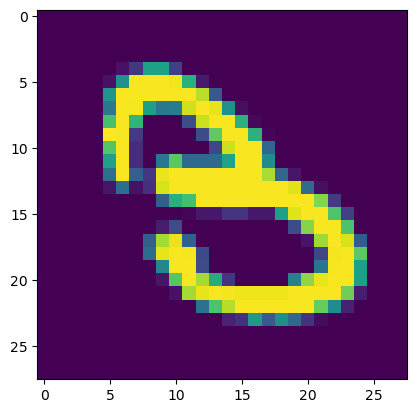

In [24]:
i = different_indices[0][1]
predicted_label = classes[i]
print("    Rótulo da imagem {} is: {}".format(i, y_test[i]))
print("    Classe predita {} is: {}".format(i, predicted_label))
plt.imshow(X_test[i])
plt.show()

**Observação**

Muitos dos erros são devidos às imagens se parecerem com outros números e não com o número de seu rótulo.